<a href="https://colab.research.google.com/github/midhunkrishnam/Machine-Learning-Algoritnms/blob/main/Randomforestsocialnetworkads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
df=pd.read_csv("/content/Social_Network_Ads.csv")
df 

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
print(df.columns)

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [ ]:
#corelation
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


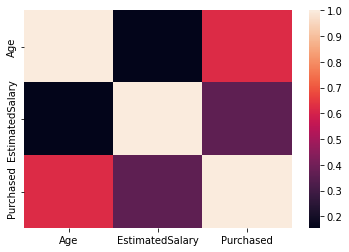

In [ ]:
#corelarion plotting-->heatmap
sns.heatmap(df.corr())

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [ ]:
df.shape

(400, 3)

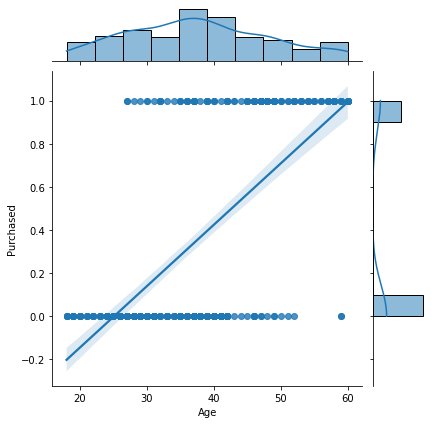

In [ ]:
 #jointplot-->advaced scatterplot(similar to scatterplot)
 sns.jointplot(x="Age",y="Purchased",data=df,kind="reg")

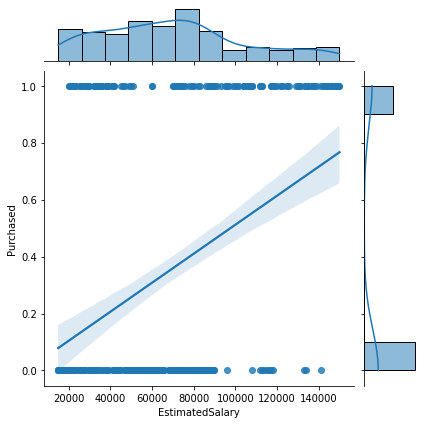

In [ ]:
sns.jointplot(x="EstimatedSalary",y="Purchased",data=df,kind="reg")

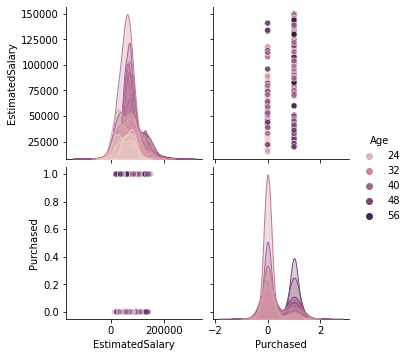

In [ ]:
sns.pairplot(df,hue="Age")

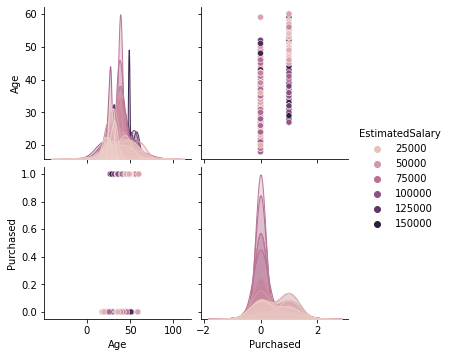

In [ ]:
sns.pairplot(df,hue="EstimatedSalary")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


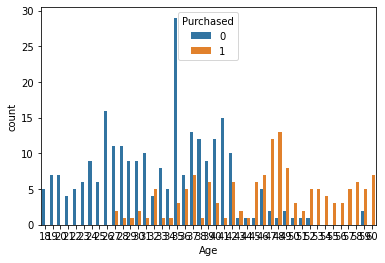

In [ ]:
sns.countplot("Age",data=df,hue="Purchased")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


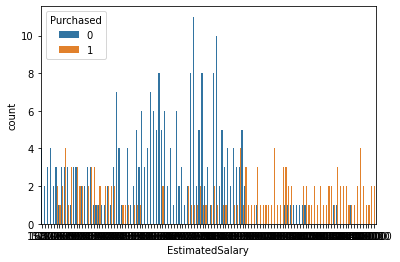

In [ ]:
sns.countplot("EstimatedSalary",data=df,hue="Purchased")

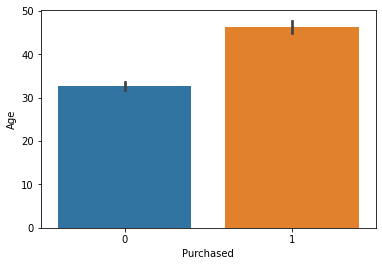

In [ ]:
sns.barplot(x="Purchased",y="Age",data=df)

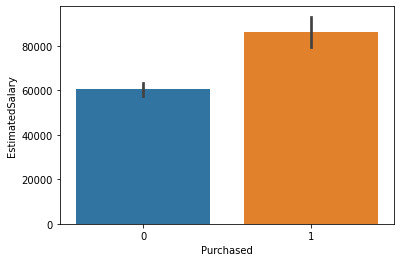

In [ ]:
sns.barplot(x="Purchased",y="EstimatedSalary",data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


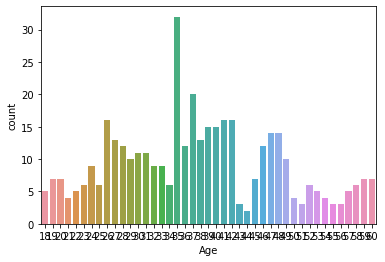

In [ ]:
sns.countplot("Age",data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


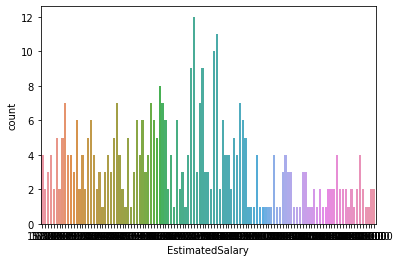

In [ ]:
sns.countplot("EstimatedSalary",data=df)

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[ 0.82778356, -1.43382709],
       [ 2.10507569,  0.51377487],
       [-0.94077478, -0.78462644],
       [ 1.02429004,  0.74984783],
       [-0.84252154, -1.25677236],
       [-0.7442683 , -0.25346227],
       [ 0.9260368 ,  1.07444816],
       [-0.84252154,  0.36622926],
       [ 0.23826411,  0.1301563 ],
       [ 0.43477059, -0.16493491],
       [-0.2530021 , -0.16493491],
       [ 1.51555624, -1.07971764],
       [-1.43204099, -0.66658995],
       [-1.72680071, -1.40431797],
       [-0.7442683 ,  0.48426575],
       [-0.2530021 ,  1.10395728],
       [ 1.417303  , -0.96168116],
       [ 0.82778356,  0.10064718],
       [ 0.14001087, -0.84364468],
       [ 1.81031597, -0.31248051],
       [-1.53029423, -1.28628149],
       [-0.84252154,  0.2777019 ],
       [ 0.9260368 , -1.40431797],
       [ 2.10507569,  0.15966542],
       [-1.82505395, -1.52235445],
       [ 1.31904976, -1.40431797],
       [ 0.43477059,  0.2777019 ],
       [-0.05649561, -0.51904435],
       [ 1.71206273,

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,criterion="entropy") 
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0])

[[67  6]
 [ 7 40]]
0.8916666666666667


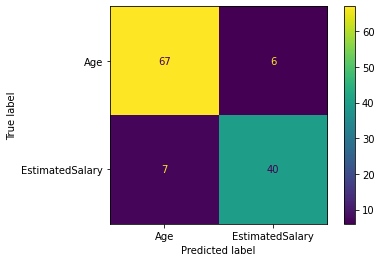

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix 
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
labels=['Age', 'EstimatedSalary', 'Purchased']
result=confusion_matrix(y_test,y_pred)
cm=ConfusionMatrixDisplay(result,display_labels=labels)
cm.plot()
score=accuracy_score(y_test,y_pred)
print(result)
score=accuracy_score(y_test,y_pred)
print(score)